<a href="https://www.kaggle.com/code/eissaislam/boston-house-price-predictions?scriptVersionId=127565685" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **introduction** 

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970.

In this, using the provided data, we must build a machine learning model to predict MEDV which is the house price 🏠

* CRIM: per capita crime rate by town
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: proportion of non-retail business acres per town
* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX: nitric oxides concentration (parts per 10 million)
* RM: average number of rooms per dwelling
* AGE: proportion of owner-occupied units built prior to 1940
* DIS: weighted distances to five Boston employment centers
* RAD: index of accessibility to radial highways
* TAX: full-value property-tax rate per 10,000 USD
* PTRATIO: pupil-teacher ratio by town
* B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT: % lower status of the population

We are going to use RandomForestRegressor ML model!✨


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score
import random


In [2]:
# Load the CSV file from Kaggle 
boston_df = pd.read_csv('/kaggle/input/boston-house-prices/housing.csv', header=None, delim_whitespace=True,
                        names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
                               'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])

In [3]:
# Display the first 5 rows of the dataset
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
# Check for missing values and outliers
print(boston_df.isnull().sum())
boston_df.describe()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# Identifying the unique number of values in the dataset
boston_df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [7]:
# Minimum price of the data
minimum_price = np.amin(boston_df['MEDV'])

# Maximum price of the data
maximum_price = np.amax(boston_df['MEDV'])

# Mean price of the data
mean_price = np.mean(boston_df['MEDV'])

# Median price of the data
median_price = np.median(boston_df['MEDV'])

# Standard deviation of prices of the data
std_price = np.std(boston_df['MEDV'])

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $5.0
Maximum price: $50.0
Mean price: $22.532806324110677
Median price $21.2
Standard deviation of prices: $9.188011545278203


In [8]:
# Preprocess the data by standardizing the features
scaler = StandardScaler()
boston_df_scaled = scaler.fit_transform(boston_df)

In [9]:
# Convert the scaled data back to a dataframe
boston_df_scaled = pd.DataFrame(boston_df_scaled, columns=boston_df.columns)

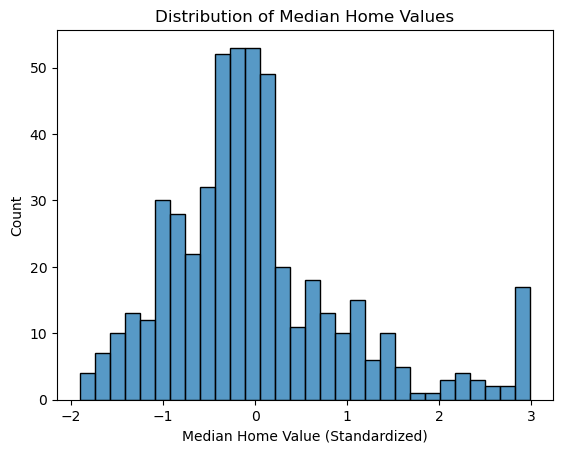

In [10]:
# Plot a histogram of the target variable
sns.histplot(data=boston_df_scaled, x='MEDV', bins=30)
plt.title('Distribution of Median Home Values')
plt.xlabel('Median Home Value (Standardized)')
plt.show()

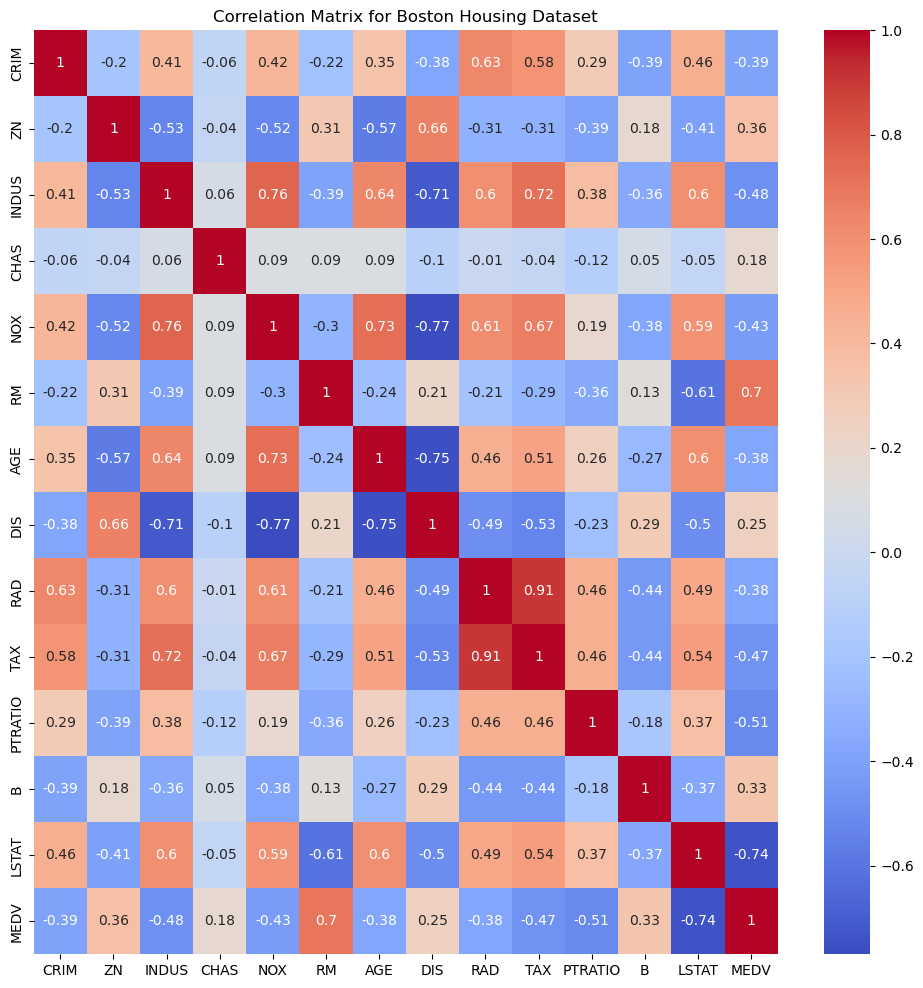

In [11]:
# Plot a heatmap of the correlation matrix
corr_matrix = boston_df_scaled.corr().round(2)
plt.figure(figsize=(12,12))
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Boston Housing Dataset')
plt.show()

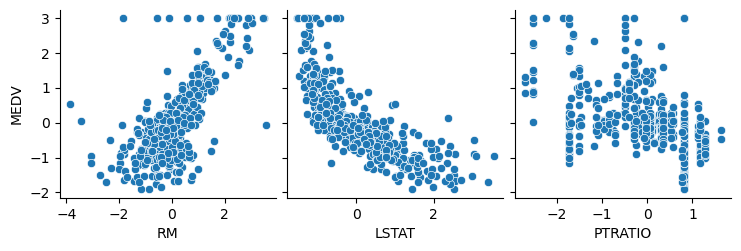

In [12]:
# Plot scatterplots of the most correlated features with the target variable
sns.pairplot(data=boston_df_scaled, x_vars=['RM', 'LSTAT', 'PTRATIO'], y_vars=['MEDV'])
plt.show()

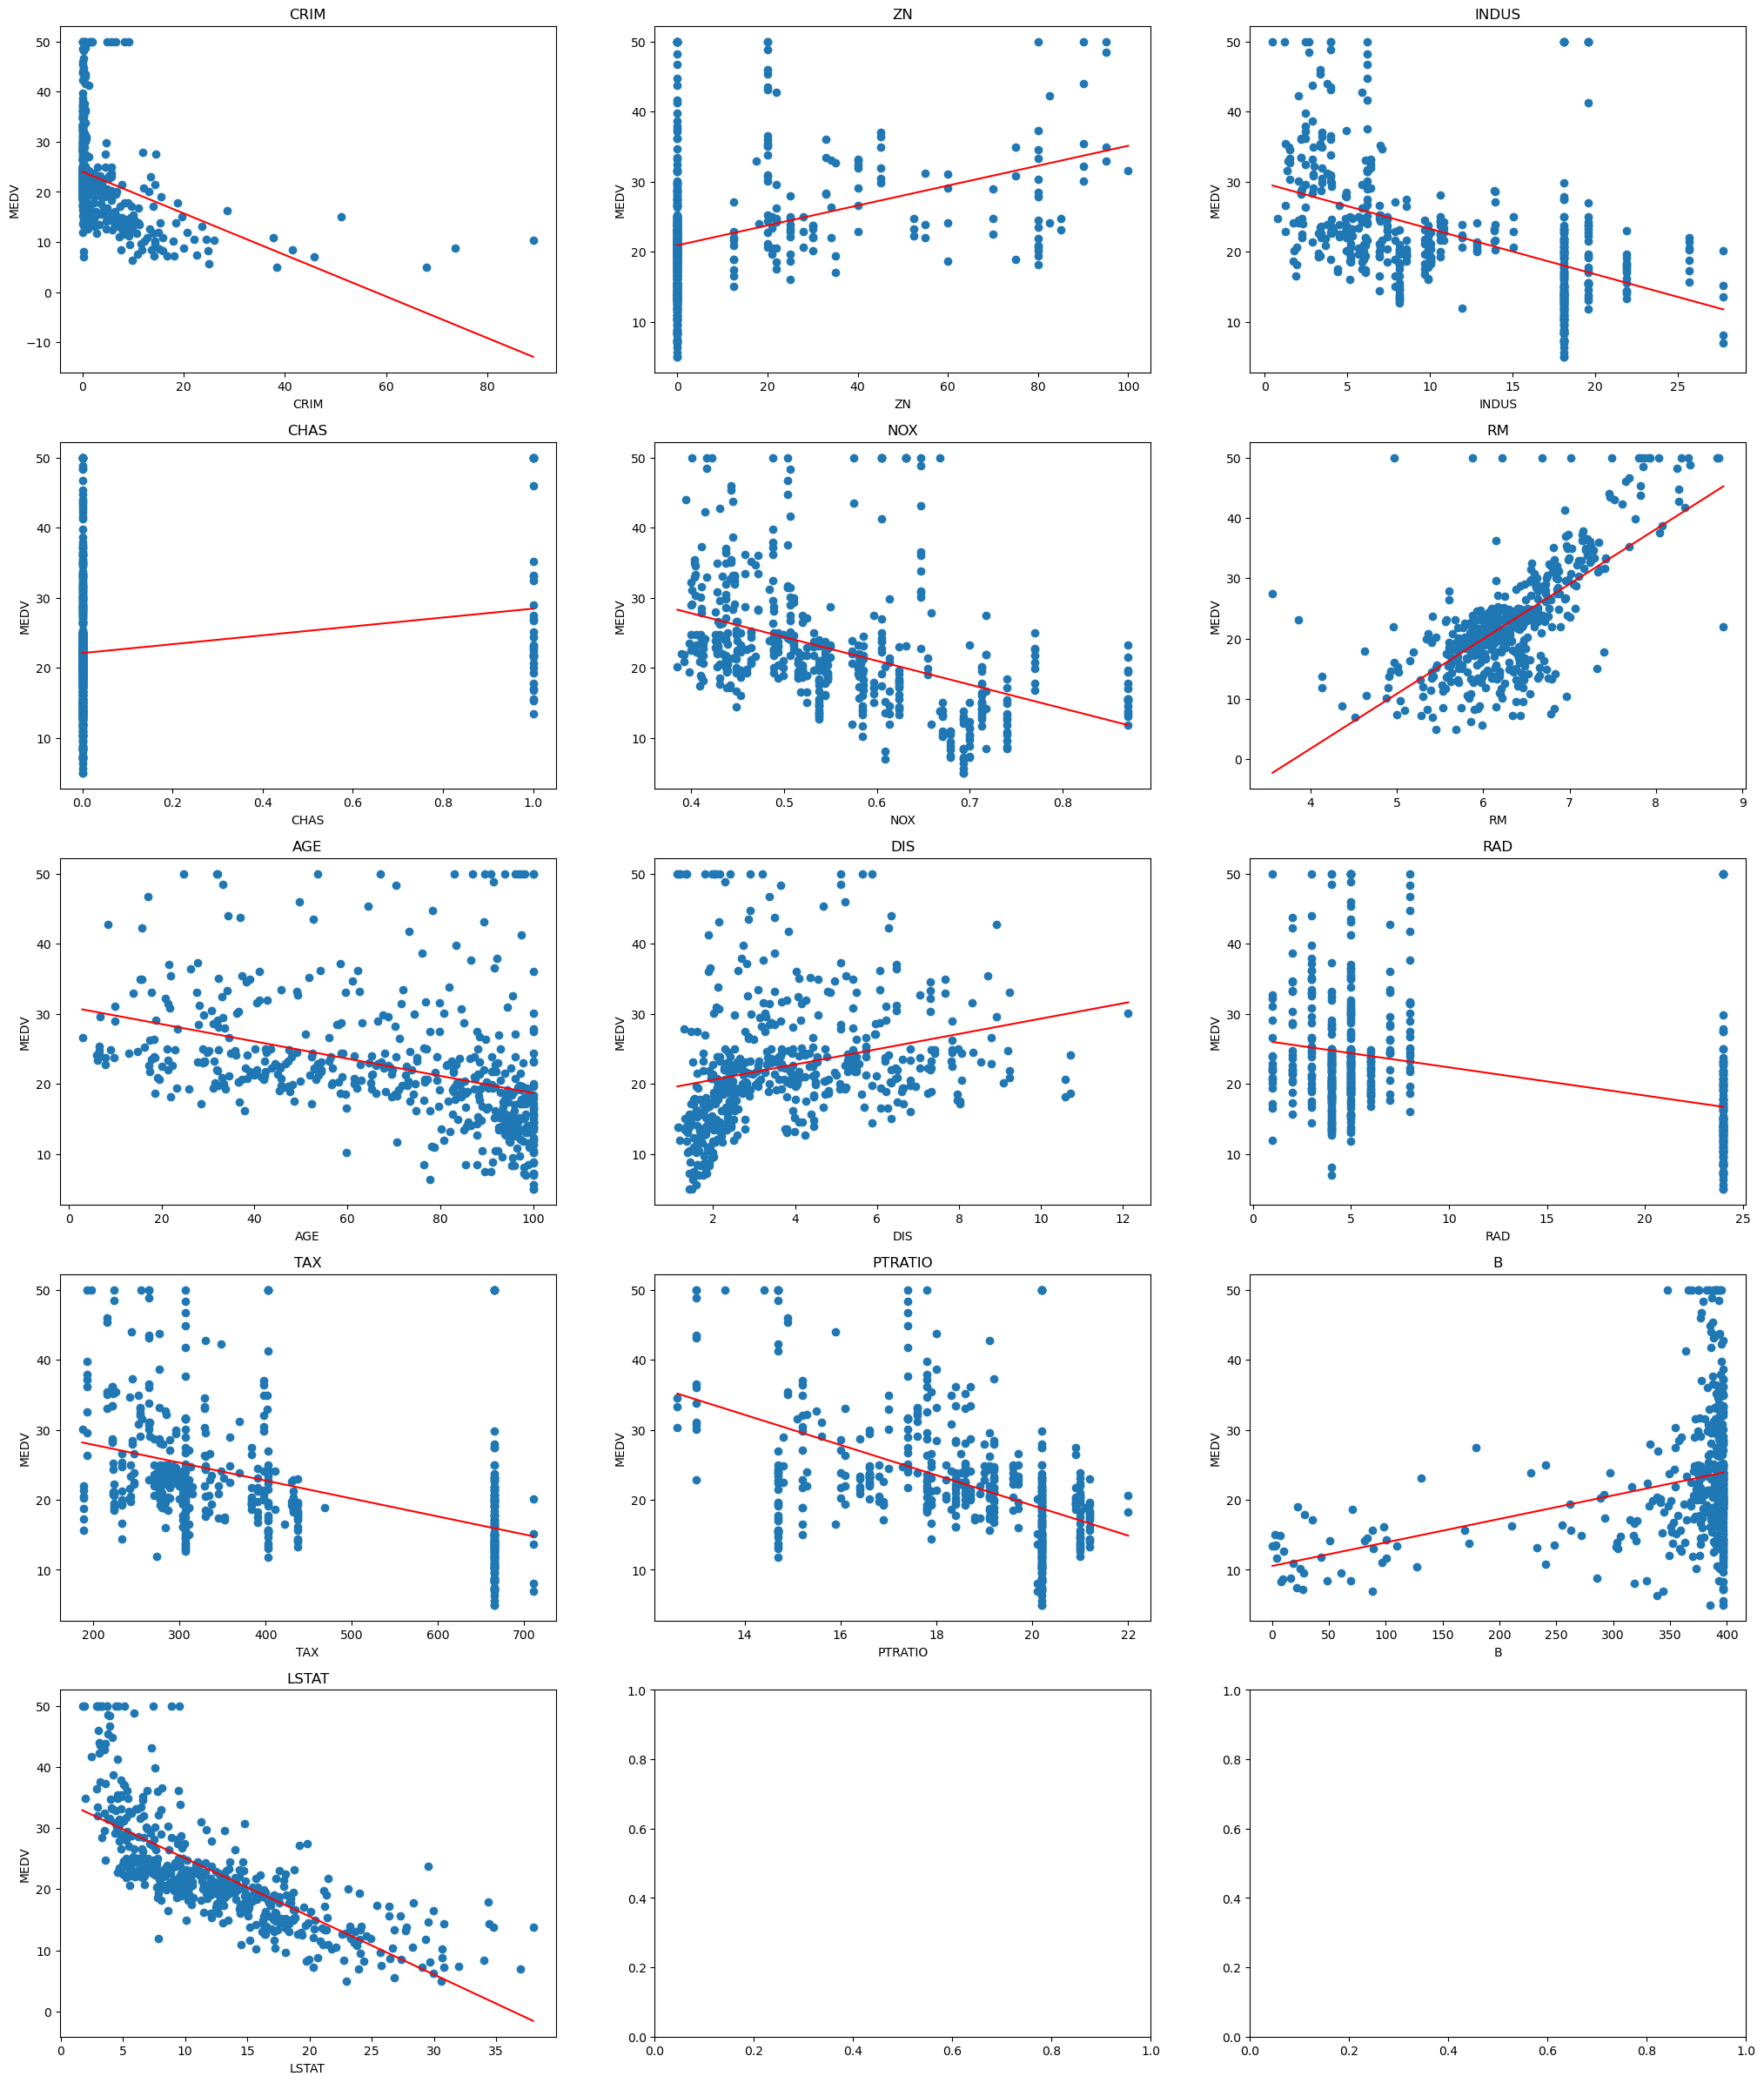

In [13]:
# Create a figure and axis for the scatter plots
fig, axs = plt.subplots(5, 3, figsize=(25, 30))
axs = axs.ravel()

# Loop over each feature and plot it against the target variable
for i, column in enumerate(boston_df.columns[:-1]):
    axs[i].scatter(boston_df[column],boston_df["MEDV"])
    axs[i].set_title(column)
    axs[i].set_xlabel(column)
    axs[i].set_ylabel("MEDV")
    
    # Calculate the line of best fit using numpy's polyfit function
    slope, intercept = np.polyfit(boston_df[column],boston_df["MEDV"], 1)
    
    # Create an array of x values for the line of best fit
    x = np.linspace(boston_df[column].min(),boston_df[column].max(), 100)
    
    # Calculate the corresponding y values for the line of best fit using the slope and intercept
    y = slope * x + intercept
    
    # Plot the line of best fit
    axs[i].plot(x, y, '-r')
    
plt.show()

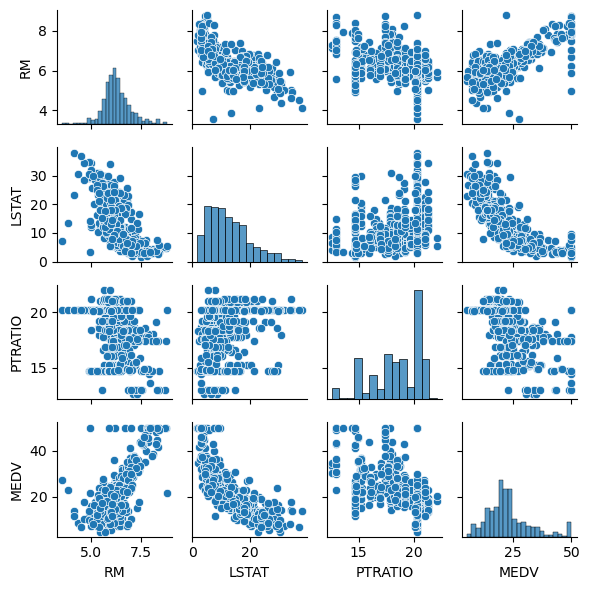

In [14]:
# Calculate and show pairplot
sns.pairplot(boston_df[['RM', 'LSTAT', 'PTRATIO','MEDV']], height=1.5)
plt.tight_layout()

In [15]:
# Split the data into training and testing sets
X = boston_df.drop('MEDV', axis=1)
y = boston_df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Select  informative features using ANOVA F-value
selector = SelectKBest(score_func=f_regression, k=12)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [17]:
# Preprocess the data by standardizing and adding polynomial features
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2)
X_train_scaled = scaler.fit_transform(poly.fit_transform(X_train_selected))
X_test_scaled = scaler.transform(poly.transform(X_test_selected))

In [18]:
# Train a random forest regressor on the training set
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [19]:
# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

In [20]:
# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", round(mse, 3))
print("R-squared value: ", round(r2, 3))
print("Accuracy of the model: ", round(r2*100, 2), "%")


Mean Squared Error:  7.767
R-squared value:  0.894
Accuracy of the model:  89.41 %


In [21]:
# Calculate the training accuracy of the model
train_accuracy = model.score(X_train_scaled, y_train) * 100
print("Training Accuracy: {:.2f}%".format(train_accuracy))

# Calculate the test accuracy of the model
test_accuracy = model.score(X_test_scaled, y_test) * 100
print("Test Accuracy: {:.2f}%".format(test_accuracy))

Training Accuracy: 97.89%
Test Accuracy: 89.41%


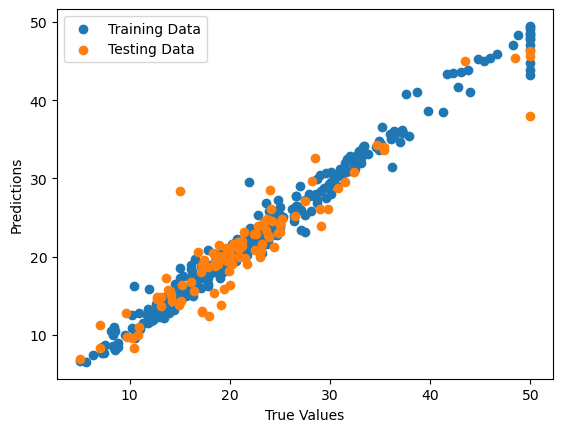

In [22]:
# Create a scatter plot to visualize the relationship between training and testing accuracy
plt.scatter(y_train, model.predict(X_train_scaled), label='Training Data')
plt.scatter(y_test, y_pred, label='Testing Data')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()

In [23]:
# Select a random row from the test data
sample_input = X_test.iloc[[0]]

# Preprocess the sample input using the same selector, scaler, and polynomial features
sample_input_selected = selector.transform(sample_input)
sample_input_scaled = scaler.transform(poly.transform(sample_input_selected))

# Make a prediction on the sample input
predicted_price = model.predict(sample_input_scaled)[0]

# Get the actual price of the selected sample input
actual_price = y_test.iloc[[0]].values[0]

# Print the predicted and actual prices
print("Predicted Price: ", predicted_price)
print("Actual Price: ", actual_price)

Predicted Price:  23.37954319655489
Actual Price:  23.6


In [24]:
# Select a random subset of 10 houses from the test data
random.seed(34)
random_indices = random.sample(range(len(y_pred)), 5)

# Print the predicted prices for the selected houses
print("Predicted Prices for Random Subset of Test Data:")
for i, index in enumerate(random_indices):
    price = y_pred[index]
    print("House", i+1, ": $", "{:.2f}".format(price))

Predicted Prices for Random Subset of Test Data:
House 1 : $ 23.08
House 2 : $ 14.32
House 3 : $ 21.88
House 4 : $ 23.88
House 5 : $ 20.52
